In [27]:
import numpy as np # import the NumPy library
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/My Drive/model/train')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Commercial', 'Hospital', 'High', 'Industrial', 'Schools', 'Single', 'Multi']

In [28]:
import os

# List the contents of the Dataset directory
base_dir = '/content/drive/My Drive/model/train'
classes = os.listdir(base_dir)
print(classes)

['Commercial', 'Hospital', 'High', 'Industrial', 'Schools', 'Single', 'Multi']


In [5]:
for class_name in classes:
    class_path = os.path.join(base_dir, class_name)

    # List all files (images) in the current class folder
    images = os.listdir(class_path)
    print(f"Class: {class_name}, Number of images: {len(images)}")

    # Example: Load and process each image
    for image_name in images:
        image_path = os.path.join(class_path, image_name)



Class: Commercial, Number of images: 80
Class: Hospital, Number of images: 80
Class: High, Number of images: 80
Class: Industrial, Number of images: 80
Class: Schools, Number of images: 80
Class: Single, Number of images: 80
Class: Multi, Number of images: 80


Resizing is the process of altering the dimensions (width and height) of an image to a specific size. The goal is to make all images in the dataset have the same dimensions, which is necessary for consistency when feeding images into a neural network.


Normalization in the context of image preprocessing often involves converting the RGB values from the range of 0 to 255 to a range of 0 to 1. This is done to standardize the input data, making it easier for the model to process and learn from the images.ormalizing is the process of scaling pixel values to a specific range, typically to make the data more suitable for processing by a neural network. The main goal of normalization is to adjust the pixel value distribution to improve the model's training efficiency and performance.Yes, exactly! In color images, pixel values typically range from 0 to 255 for each color channel (Red, Green, Blue) because each channel is represented using 8 bits per pixel. Normalization involves scaling these pixel values to a different range, often [0, 1] or [-1, 1], to facilitate better training and performance of machine learning models.

Class: Commercial


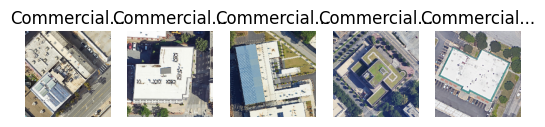

Class: Hospital


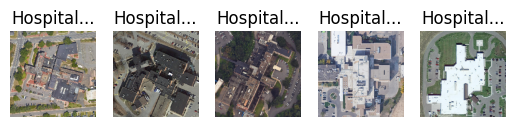

Class: High


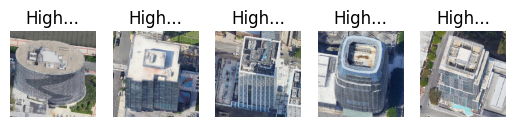

Class: Industrial


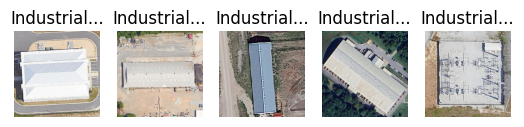

Class: Schools


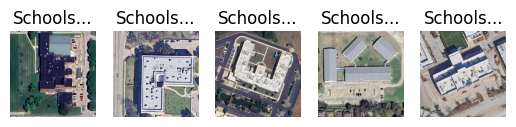

Class: Single


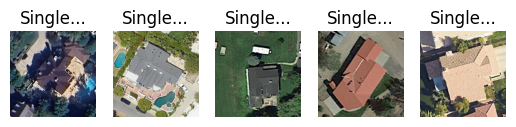

Class: Multi


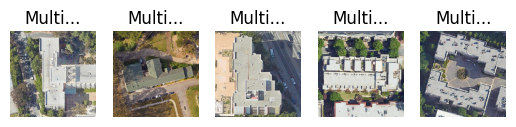

In [6]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Number of images to display from each class
num_images_to_display = 5

for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    images = os.listdir(class_path)

    print(f'Class: {class_name}')

    # Display a few images from this class
    for i, image_name in enumerate(images[:num_images_to_display]):
        image_path = os.path.join(class_path, image_name)

        # Load the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust the target size as needed
        image_array = img_to_array(image)
        #image_array = image_array / 255.0  # Normalize if necessary

        # Plot the image
        plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(image_array.astype('uint8'))  # Convert to uint8 type for displaying
        plt.title(f"{class_name[:10]}...")  # Truncate the title if it's too long
        plt.axis('off')

    plt.show()  # Show the images for this class


cval stands for “constant value.” When you apply padding to an image, cval specifies the value to be used for the padded pixels. This is particularly useful when you want to pad an image with a specific value rather than the default, which is usually zero.

Batch size refers to the number of training examples processed in one iteration during model training. An epoch is a full pass through the entire dataset, while an iteration is a single update of the model's parameters. For example, with 1,000 images and a batch size of 100, it takes 10 iterations to complete one epoch. Smaller batch sizes lead to more frequent updates, potentially improving generalization but requiring more time and memory management. The choice of batch size balances training speed, memory usage, and model performance.

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
target_height = 224
target_width = 224

# Define the data augmentation and preprocessing pipeline
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    #rotation_range=40,  # Rotate images by up to 40 degrees
    #width_shift_range=0.2,  # Shift the image width by up to 20%
   # height_shift_range=0.2,  # Shift the image height by up to 20%
    #shear_range=0.2,  # Apply shearing transformations
    #zoom_range=0.2,  # Zoom in/out by up to 20%
   # horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest' , # Fill missing pixels with the nearest pixel value
    cval=0,  # Value used for padding (black)
    preprocessing_function=lambda x: tf.image.resize_with_pad(x, target_height, target_width)
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize pixel values to [0, 1] for validation
)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/model/train',  # Path to your training data directory
    target_size=(target_height, target_width),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Assuming categorical classification
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/My Drive/model/val',  # Path to your validation data directory
    target_size=(target_height, target_width),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Assuming categorical classification
)


Found 560 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


The line model = models.Sequential() is used to create a new instance of a sequential model in Keras. The Sequential model is a linear stack of layers that allows you to build neural networks layer by layer, where each layer has exactly one input tensor and one output tensor.

A 2D convolution layer in CNNs applies convolution operations to 2D input, like images. The `filters=32` parameter means the layer will produce 32 different feature maps, each detecting different features (e.g., edges, textures) in the input image. The `kernel_size=(3, 3)` defines the filter as a 3x3 matrix, which slides over the image, identifying patterns and features in 3x3 regions.

The ReLU activation function is applied to the output of each filter, introducing non-linearity and helping the network learn more complex representations.


This layer is used in Convolutional Neural Networks (CNNs) to reduce the spatial dimensions (height and width) of the input feature maps.The `pool_size=(2, 2)` specifies a 2x2 window that slides over the feature map, outputting the maximum value from each 2x2 region.

Each convolutional layer detects different levels of features, and each pooling layer reduces the feature map size, contributing to the overall effectiveness of the network.

Batch Normalization helps keep the neural network's activations (the outputs of each layer) stable during training. It makes sure that these activations have a consistent scale and distribution, which helps the network train faster and more reliably. By doing this, it also introduces a bit of randomness that can help the network avoid overfitting to the training data.

The Flatten layer converts the multi-dimensional output from previous layers into a one-dimensional vector. This is needed because subsequent dense layers require a 1D input.

 Dense layers are typically used for making predictions or classifications after feature extraction, as they combine all the features learned by previous layers.
Regularization technique that randomly drops some neurons during training to prevent overfitting.

Unlike ReLU, which is used for hidden layers, softmax is specifically designed for the output layer in classification problems. It transforms the output scores into probabilities, making it easier to interpret and select the most likely class.



In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add a convolutional layer
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(target_height, target_width, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add another max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add a batch normalization layer
model.add(layers.BatchNormalization())

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add a fully connected (dense) layer
model.add(layers.Dense(units=128, activation='relu'))

# Add a dropout layer for regularization
model.add(layers.Dropout(rate=0.5))

# Add another fully connected (dense) layer
model.add(layers.Dense(units=7, activation='softmax'))  # softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_accuracy_own_model = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy_own_model}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.2553 - loss: 10.0823 - val_accuracy: 0.1429 - val_loss: 1.9808
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step - accuracy: 0.4404 - loss: 1.4704 - val_accuracy: 0.1429 - val_loss: 2.0373
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 433ms/step - accuracy: 0.7295 - loss: 0.8548 - val_accuracy: 0.1429 - val_loss: 2.0074
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 415ms/step - accuracy: 0.8379 - loss: 0.4926 - val_accuracy: 0.2714 - val_loss: 1.9585
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 489ms/step - accuracy: 0.9060 - loss: 0.3324 - val_accuracy: 0.1429 - val_loss: 1.9302
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 390ms/step - accuracy: 0.9582 - loss: 0.1583 - val_accuracy: 0.1429 - val_loss: 1.9508
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 413ms/step - accuracy: 0.9726 - loss: 0.1228 - val_accuracy: 0.2143 - val_loss: 1.9329
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - accuracy: 0.9531 - loss: 0.1424 - val_accuracy: 0.2571

In [9]:
from keras.applications import VGG16
from keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model_v = models.Sequential()
model_v.add(base_model)
model_v.add(layers.GlobalAveragePooling2D())
model_v.add(layers.Dense(128, activation='relu'))
model_v.add(layers.Dense(7, activation='softmax'))  # Adjust the number of units and activation as needed

for layer in base_model.layers:
     layer.trainable = False
model_v.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_v.fit(train_generator,
           epochs=10,
           batch_size=32,
           validation_data=validation_generator)
test_loss, test_accuracy_vgg16 = model.evaluate(validation_generator)
print(f'Test Accuracy_vgg16: {test_accuracy_vgg16}')




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.1787 - loss: 1.9612 - val_accuracy: 0.2857 - val_loss: 1.7783
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 478ms/step - accuracy: 0.4261 - loss: 1.6673 - val_accuracy: 0.5000 - val_loss: 1.5579
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 788ms/step - accuracy: 0.5859 - loss: 1.4440 - val_accuracy: 0.4714 - val_loss: 1.4124
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 503ms/step - accuracy: 0.6466 - loss: 1.2838 - val_accuracy: 0.5286 - val_loss: 1.3295
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 488ms/step - accuracy: 0.6427 - loss: 1.1868 - val_accuracy: 0.5286 - val_loss: 1.2903
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 474ms/step - accuracy: 0.6891 - loss: 1.0453 - val_accuracy: 0.6000 - val_loss: 1.2350
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 502ms/step - accuracy: 0.7002 - loss: 0.9935 - val_accuracy: 0.5571 - val_loss: 1.1458
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 513ms/s

weights are the values that a neural network learns during training to make predictions.If you’re trying to predict whether an image is of a cat or a dog, the model will have weights that determine how much each feature of the image (like shapes or colors) influences its decision. The model adjusts these weights as it learns from more data.

In [39]:
from keras.applications import DenseNet201
from keras import layers, models
from keras.models import load_model

# Load the DenseNet201 model with pre-trained weights, excluding the top layers
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model
model_Den = models.Sequential()

# Add the DenseNet201 base model
model_Den.add(base_model)

# Add a GlobalAveragePooling2D layer to reduce the output to a single 2D feature map
model_Den.add(layers.GlobalAveragePooling2D())

# Add a fully connected layer with 128 units and ReLU activation
model_Den.add(layers.Dense(128, activation='relu'))

# Add the final output layer with 7 units (adjust as per your number of classes) and softmax activation
model_Den.add(layers.Dense(7, activation='softmax'))

# Freeze the layers in the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_Den.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_Den.fit(train_generator,
          epochs=10,
          batch_size=32,
          validation_data=validation_generator)

# Evaluate the model on the validation set
test_loss, test_accuracy_DenseNet201 = model_Den.evaluate(validation_generator)
print(f'Test Accuracy_DenseNet201: {test_accuracy_DenseNet201}')


# Load the trained model




Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 353s 13s/step - accuracy: 0.3105 - loss: 1.7690 - val_accuracy: 0.5571 - val_loss: 1.1453
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.7333 - loss: 0.8116 - val_accuracy: 0.6429 - val_loss: 0.9251
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 221s 10s/step - accuracy: 0.8341 - loss: 0.5402 - val_accuracy: 0.7429 - val_loss: 0.7635
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 192s 9s/step - accuracy: 0.8580 - loss: 0.4403 - val_accuracy: 0.8000 - val_loss: 0.8036
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 190s 9s/step - accuracy: 0.9032 - loss: 0.3580 - val_accuracy: 0.7143 - val_loss: 0.9015
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 204s 9s/step - accuracy: 0.9496 - loss: 0.2363 - val_accuracy: 0.7286 - val_loss: 0.9301
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 199s 9s/step - accuracy: 0.9539 - loss: 0.2140 - val_accuracy: 0.7429 - val_loss: 0.9465
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 191s 10s/step - accuracy: 0.9567 - loss: 0.1898 - val_accuracy: 0.6571 - val_loss:

In [11]:
from keras.applications import DenseNet201,Xception
from keras import layers, models

#Load the DenseNet201 model with pre-trained weights, excluding the top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Create a new model
model_x = models.Sequential()

# # Add the DenseNet201 base model
model_x.add(base_model)

# # Add another convolutional layer
model_x.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# # Add another max pooling layer
model_x.add(layers.MaxPooling2D(pool_size=(2, 2)))

# # Add a GlobalAveragePooling2D layer to reduce the output to a single 2D feature map
model_x.add(layers.GlobalAveragePooling2D())

# # Add a fully connected layer with 128 units and ReLU activation
model_x.add(layers.Dense(128, activation='relu'))

# # Add the final output layer with 7 units (adjust as per your number of classes) and softmax activation
model_x.add(layers.Dense(7, activation='softmax'))

# # Freeze the layers in the base model to prevent them from being trained
for layer in base_model.layers:
     layer.trainable = False

# # Compile the model
model_x.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
model_x.fit(train_generator,
           epochs=10,
           batch_size=32,
          validation_data=validation_generator)

# # Evaluate the model on the validation set
test_loss, test_accuracy_Xception = model_x.evaluate(validation_generator)
print(f'Test Accuracy_x: {test_accuracy_Xception}')


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3038 - loss: 2.0425 - val_accuracy: 0.6143 - val_loss: 1.1518
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 502ms/step - accuracy: 0.6858 - loss: 0.9315 - val_accuracy: 0.5429 - val_loss: 1.2436
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 530ms/step - accuracy: 0.7910 - loss: 0.5916 - val_accuracy: 0.6143 - val_loss: 0.9968
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 470ms/step - accuracy: 0.9245 - loss: 0.2577 - val_accuracy: 0.6429 - val_loss: 1.0667
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 480ms/step - accuracy: 0.9778 - loss: 0.1402 - val_accuracy: 0.6571 - val_loss: 0.9712
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 475ms/step - accuracy: 1.0000 - loss: 0.0521 - val_accuracy: 0.6000 - val_loss: 1.1047
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.5857 - val_loss: 1.1102
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 495ms/s

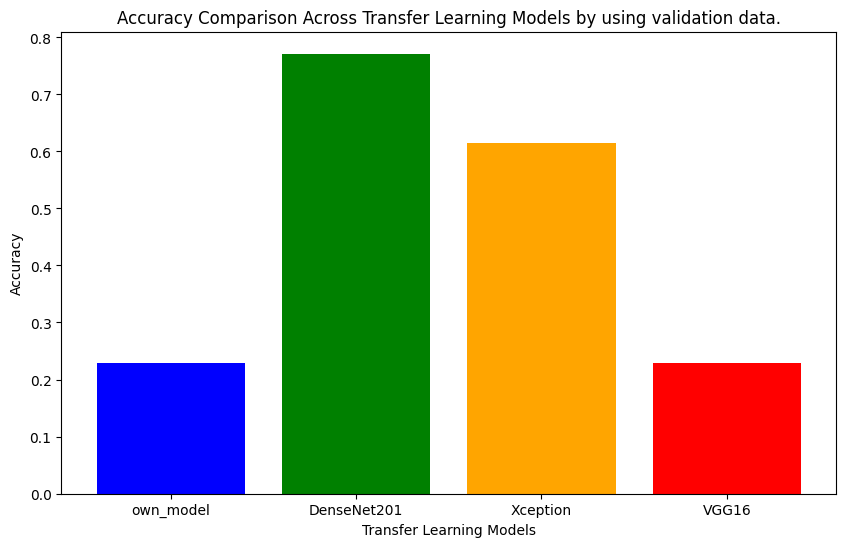

In [49]:
import matplotlib.pyplot as plt

own_model='model'
DenseNet201='model_Den'
Xception='model_x'
ResNet50='ResNet50'
VGG16='VGG16'

# Fix the typo and remove unnecessary self-assignment
test_accuracy_own_model = 0.22857142984867096
test_accuracy_vgg16 =  0.22857142984867096# Or use the actual value directly if available.
test_accuracy_DenseNet201 = 0.7714285850524902
test_accuracy_Xception =  0.6142857074737549

# List of pre-trained models you used
models = ['own_model','DenseNet201', 'Xception', 'VGG16']

# Accuracy values obtained from each model
accuracies = [test_accuracy_own_model, test_accuracy_DenseNet201, test_accuracy_Xception, test_accuracy_vgg16]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Add labels and title
plt.xlabel('Transfer Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Transfer Learning Models by using validation data.')

# Display the plot
plt.show()

In [44]:
# Testing
Testing_generator = validation_datagen.flow_from_directory(
    '/content/drive/My Drive/model/test',  # Path to your test data directory
    target_size=(target_height, target_width),  # Resize images to match input shape
    batch_size=32,
    class_mode='categorical'  # Categorical classification
)

# Evaluate the model on the test set
test_loss, test_accuracy = model_Den.evaluate(Testing_generator)
print(f'Test Accuracy: {test_accuracy}')

# Get predictions for the test set
predictions = model_Den.predict(Testing_generator)

# Convert predictions to predicted class indices
predicted_classes = predictions.argmax(axis=1)

# Get true labels from the test generator
true_classes = Testing_generator.classes
class_labels = list(Testing_generator.class_indices.keys())

# Optionally: You can print or check the predicted and true labels
print(f"Predicted Classes: {predicted_classes}")
print(f"True Classes: {true_classes}")


Found 70 images belonging to 7 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.6489 - loss: 1.1375
Test Accuracy: 0.6571428775787354
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step
Predicted Classes: [2 4 1 1 5 6 1 0 1 3 6 2 2 6 4 1 4 4 2 2 2 4 3 4 4 6 5 1 1 6 4 4 6 6 3 4 1
 0 0 3 4 6 0 3 6 5 6 2 3 1 0 0 2 5 2 4 4 2 4 4 6 1 2 1 6 2 4 0 2 6]
True Classes: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6]


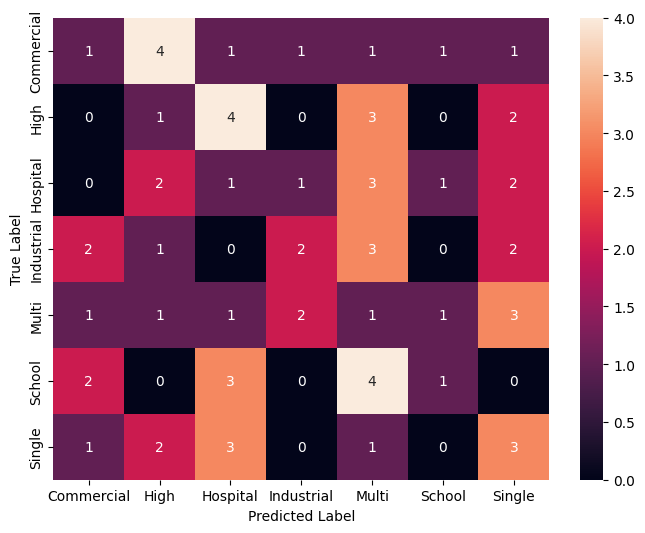

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()